In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras import layers
from google.colab import files

In [ ]:
# Unggah dataset
uploaded = files.upload()

Saving dataset_hotel.csv to dataset_hotel (1).csv


In [ ]:
# Load dataset
data = pd.read_csv("dataset_hotel.csv", sep=";")

In [ ]:
# Konversi kolom 'latitude', dan 'longitude' menjadi float jika diperlukan
# Check if the columns are already numeric. If not, convert them.
if not pd.api.types.is_numeric_dtype(data['latitude']):
    data['latitude'] = data['latitude'].str.replace(',', '.').astype(float)
if not pd.api.types.is_numeric_dtype(data['longitude']):
    data['longitude'] = data['longitude'].str.replace(',', '.').astype(float)

# Koordinat pusat kota (Alun-alun Malang)
center_lat, center_lon = -7.9826145, 112.6308113

# Haversine function
def haversine(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  # Radius bumi dalam km
    return c * r

# Hitung jarak
data['distance_to_center'] = haversine(data['latitude'], data['longitude'], center_lat, center_lon)

# Normalisasi jarak
scaler = MinMaxScaler()
data['distance_to_center'] = scaler.fit_transform(data[['distance_to_center']])

print(data)

                                        name  rating  review       category  \
0                          Hotel Tugu Malang     4.7    2511          Hotel   
1                        SO! Boutique Hostel     4.4     545         Hostel   
2                        Hotel Aria Gajayana     4.6    7203          Hotel   
3                  Bobopod Alun-Alun, Malang     4.6     374  Capsule hotel   
4                       Riche Heritage Hotel     4.2    1227          Hotel   
..                                       ...     ...     ...            ...   
115                            Kost putra Q6     4.5       2         Hostel   
116                                  KostUti     NaN       0         Hostel   
117                          Home Stay Azzam     NaN       0         Hostel   
118  Jasmin Boarding House Graha Agung SN 11     NaN       0         Hostel   
119                           Kost Putri SPJ     4.2      16         Hostel   

                                           descript

In [ ]:
# Input dan output
X = data[['distance_to_center']].values
y = 1 / (1 + data['distance_to_center'].values)  # Skor relevansi (jarak terbalik)

# Bangun model
model = tf.keras.Sequential([
    layers.Input(shape=(X.shape[1],)),  # Jumlah fitur input
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Skor antara 0-1
])

# Compile model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

# Training model
history = model.fit(X, y, epochs=10, batch_size=1, validation_split=0.2)

# Prediksi skor relevansi
predictions = model.predict(X)
data['predicted_score'] = predictions

# Tampilkan nama, jarak (asli), dan skor prediksi
# Denormalisasi jarak agar kembali ke skala asli
data['distance_to_center_km'] = scaler.inverse_transform(data[['distance_to_center']])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,241 (8.75 KB)

 Trainable params: 2,241 (8.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0838 - mae: 0.2573 - val_loss: 0.0904 - val_mae: 0.2676
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0301 - mae: 0.1437 - val_loss: 0.0866 - val_mae: 0.2601
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0200 - mae: 0.1211 - val_loss: 0.0439 - val_mae: 0.1863
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0107 - mae: 0.0884 - val_loss: 0.0096 - val_mae: 0.0905
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0048 - mae: 0.0593 - val_loss: 7.6692e-04 - val_mae: 0.0230
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0021 - mae: 0.0405 - val_loss: 0.0012 - val_mae: 0.0256
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0019 - mae: 0.0363 - val_loss: 0.0017 - val_mae: 0.0322
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0015 - mae: 0.0322 - val_loss: 0.0027 - val_mae: 0.0420
Epoch 9/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0016 - m

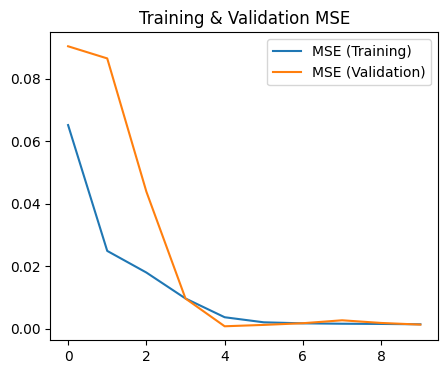

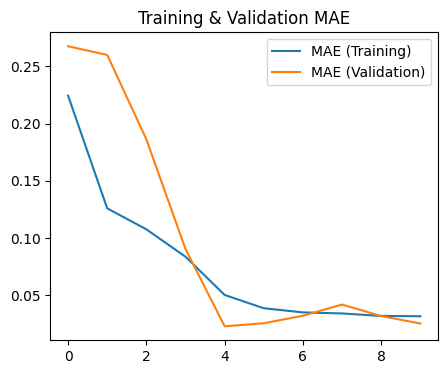

In [ ]:
import matplotlib.pyplot as plt

# Plot MSE dan MAE selama training
plt.figure(figsize=(5, 4))
plt.plot(history.history['loss'], label='MSE (Training)')
plt.plot(history.history['val_loss'], label='MSE (Validation)')
plt.legend()
plt.title('Training & Validation MSE')
plt.show()

plt.figure(figsize=(5, 4))
plt.plot(history.history['mae'], label='MAE (Training)')
plt.plot(history.history['val_mae'], label='MAE (Validation)')
plt.legend()
plt.title('Training & Validation MAE')
plt.show()


In [ ]:
# Output akhir
# Assuming 'placeId' or another column contains hotel names, replace 'placeId' with the correct column name if needed
output = data[['name', 'distance_to_center_km', 'predicted_score']].sort_values(by='predicted_score', ascending=False)
print(output)

                                                 name  distance_to_center_km  \
4                                Riche Heritage Hotel               0.153998   
17                                      Hotel Pelangi               0.155649   
3                           Bobopod Alun-Alun, Malang               0.127162   
44   Urbanview Hotel Fif Fa Kauman Malang by RedDoorz               0.212064   
50                                      Hotel Santosa               0.258555   
..                                                ...                    ...   
76                         Villa Bukit Tidar C1 - 612               6.521052   
69                                              Villa               6.661778   
111                                           Du'Kost               6.934847   
117                                   Home Stay Azzam               7.163425   
106                                    NN. Griya Kost               7.450075   

     predicted_score  
4           0.92

In [ ]:
# Menyimpan model ke file .h5
model.save('model.h5')

In [ ]:
# Mengonversi model ke TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Menyimpan model TensorFlow Lite ke file .tflite
with open('model_relevansi_jarakkota.tflite', 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmpr9w1n0mx'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  139039359966848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139039314354320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139039314361008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139039314358896: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139039314360304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139039315005280: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [ ]:
pip install tensorflowjs


In [ ]:
import tensorflowjs as tfjs

# Mengonversi model .h5 ke format TensorFlow.js
!tensorflowjs_converter --input_format keras model.h5 model_tfjs/

2024-12-12 06:49:32.754666: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733986172.780826    2093 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733986172.788312    2093 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
failed to lookup keras version from the file,
    this is likely a weight only file


In [ ]:
import subprocess

# Tentukan path model .h5 dan folder output untuk model TensorFlow.js
h5_model_path = 'model.h5'
output_folder = 'model_tfjs/'

# Menjalankan perintah tensorflowjs_converter menggunakan subprocess
subprocess.run(['tensorflowjs_converter', '--input_format', 'keras', h5_model_path, output_folder])

print("Model berhasil dikonversi!")


Model berhasil dikonversi!
